In [158]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [159]:
# Contains statistics abouts players performance in individual matches.
players = pd.read_csv('players.csv')
# Contains statistics abouts every individual matches.
matches = pd.read_csv('match.csv')
# Contains information about each hero
heroes = pd.read_csv('hero_names.csv')

In [160]:
players.columns

Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep',
       'xp_roshan', 'xp_other', 'gold_other', 'gold_death', 'gold_buyback',
       'gold_abandon', 'gold_sell', 'gold_destroying_structure',
       'gold_killing_heros', 'gold_killing_creeps', 'gold_killing_roshan',
       'gold_killing_couriers', 'unit_order_none',
       'unit_order_move_to_position', 'unit_order_move_to_target',
       'unit_order_attack_move', 'unit_order_attack_target',
       'unit_order_cast_position', 'unit_order_cast_target',
       'unit_order_cast_target_tree', 'unit_order_cast_no_target',
       'unit_order_cast_toggle', 'unit_order_hold_position',
       'unit_order_train_ability', 'unit_order_drop_item',


In [161]:
heroClustering = players[['hero_id', 'gold',
       'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'hero_damage',
       'hero_healing', 'tower_damage', 'level']]

In [162]:
type(heroClustering)

pandas.core.frame.DataFrame

In [163]:
heroClustering

,hero_id,gold,gold_per_min,xp_per_min,kills,deaths,assists,hero_damage,hero_healing,tower_damage,level
0,86,3261,347,362,9,3,18,8690,218,143,16
1,51,2954,494,659,13,3,18,23747,0,423,22
2,83,110,350,385,0,4,15,4217,1595,399,17
3,11,1179,599,605,8,4,19,14832,2714,6055,21
4,67,3307,613,762,20,3,17,33740,243,1833,24
...,...,...,...,...,...,...,...,...,...,...,...
499995,100,2718,468,626,16,9,16,22127,0,1227,23
499996,9,3755,507,607,12,6,11,12381,0,2269,23
499997,90,1059,371,404,5,3,11,7050,872,87,18
499998,73,3165,780,703,8,6,17,16474,0,2851,25


### 1. correlation of each feactures using seaborn

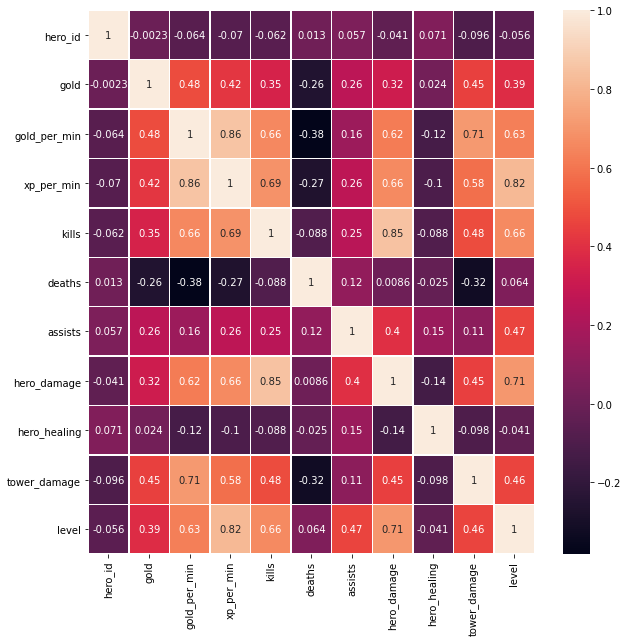

In [164]:
import seaborn as sns
corr=heroClustering.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

All of the features we find in the dataset might not be useful in building a machine learning model to make the necessary prediction. So, feature selection plays a huge role in building a machine learning model. Hence, we are using Seaborn heatmap to check correlations among columns. Pink means positive, Purple means negative. The stronger the color, the larger the correlation magnitude. Now looking at the chart above, we can see that “gold_per_min” and “ex_per_min” have high correlation, we can drop one of the two features. 

### 2. lookup hero name in every matches

In [165]:
heroes

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden
...,...,...,...
107,npc_dota_hero_terrorblade,109,Terrorblade
108,npc_dota_hero_phoenix,110,Phoenix
109,npc_dota_hero_oracle,111,Oracle
110,npc_dota_hero_winter_wyvern,112,Winter Wyvern


In [166]:
hero_lookup = dict(zip(heroes['hero_id'], heroes['localized_name']))

In [169]:
# hero_lookup

In [23]:
hero_lookup[0] = 'unknown'
heroClustering['localized_name'] = heroClustering['hero_id'].apply(lambda _id : hero_lookup[_id])

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
heroClustering.head()

,hero_id,gold,gold_per_min,xp_per_min,kills,deaths,assists,hero_damage,hero_healing,tower_damage,level,localized_name
0,86,3261,347,362,9,3,18,8690,218,143,16,Rubick
1,51,2954,494,659,13,3,18,23747,0,423,22,Clockwerk
2,83,110,350,385,0,4,15,4217,1595,399,17,Treant Protector
3,11,1179,599,605,8,4,19,14832,2714,6055,21,Shadow Fiend
4,67,3307,613,762,20,3,17,33740,243,1833,24,Spectre


In [25]:
heroClustering.shape

(500000, 12)

### 3. Find out most popular Dota 2 Heroes

In [26]:
heroClustering['localized_name'].value_counts()

Windranger      20881
Shadow Fiend    17007
Invoker         11676
Earthshaker     11323
Slardar         11181
                ...  
Lone Druid        967
Brewmaster        931
Elder Titan       838
Chen              579
unknown            37
Name: localized_name, Length: 111, dtype: int64

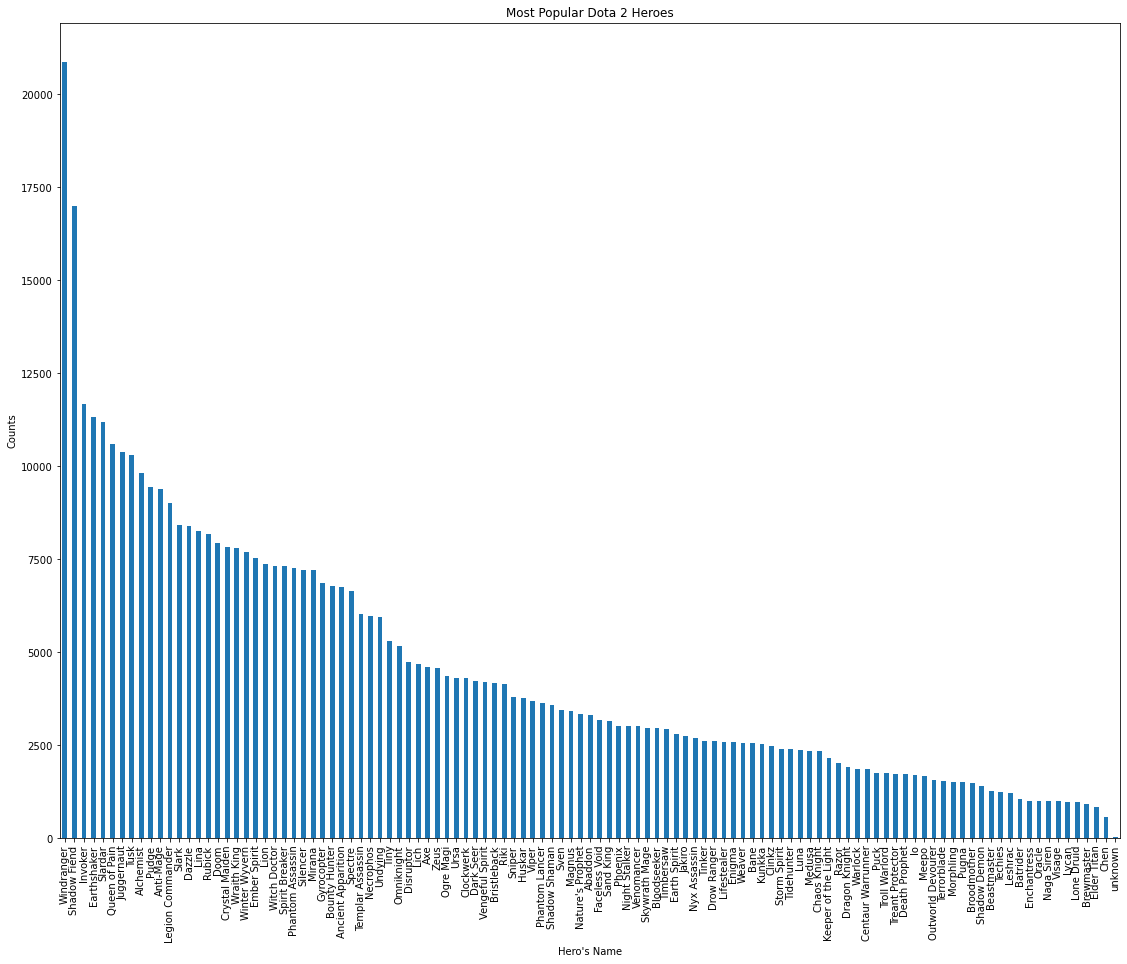

In [27]:
Most_Popular_Hero=heroClustering['localized_name'].value_counts().plot(title='Most Popular Dota 2 Heroes',kind='bar',figsize=(19,15));
plt.xlabel("Hero's Name")
plt.ylabel("Counts")
plt.show()

#### we can see that the top three popular heroes are Windranger, Shadow Fiend and Invoker as they are over complicated but worth playing.

### 4. Find out statistics about each hero

In [28]:
heroes_stats = heroClustering.groupby(['localized_name']).mean()
heroes_stats.drop('unknown',inplace=True)

In [29]:
heroes_stats

,hero_id,gold,gold_per_min,xp_per_min,kills,deaths,assists,hero_damage,hero_healing,tower_damage,level
localized_name,,,,,,,,,,,
Abaddon,102.0,1856.153474,363.055287,417.260725,5.005740,6.278550,12.647432,9660.720846,2242.337462,1009.606949,17.108157
Alchemist,73.0,2769.521633,709.545455,577.001832,6.679019,7.173369,11.647562,14438.700906,10.312735,2585.172758,20.491805
Ancient Apparition,68.0,1662.564934,313.147046,324.378054,4.826151,7.492818,13.356286,8888.788094,213.265956,298.453280,15.517252
Anti-Mage,1.0,2392.246275,554.192742,580.392827,7.340996,5.449979,6.722222,10162.878033,135.156769,3081.401767,20.574819
Axe,2.0,1682.507933,400.109107,442.938274,8.525321,9.365138,10.498153,11945.333188,14.217779,453.616605,18.033254
...,...,...,...,...,...,...,...,...,...,...,...
Windranger,21.0,1904.752167,434.759973,480.775538,9.061491,6.874000,9.979407,13815.913510,8.870217,2273.793113,18.853072
Winter Wyvern,112.0,1737.437573,309.383266,335.962973,3.637911,7.674678,12.228401,6869.851111,313.957646,314.619852,15.408601
Witch Doctor,30.0,1583.393935,311.429450,338.096162,5.791968,8.706734,13.071985,9381.819424,2273.344625,448.930747,15.648409


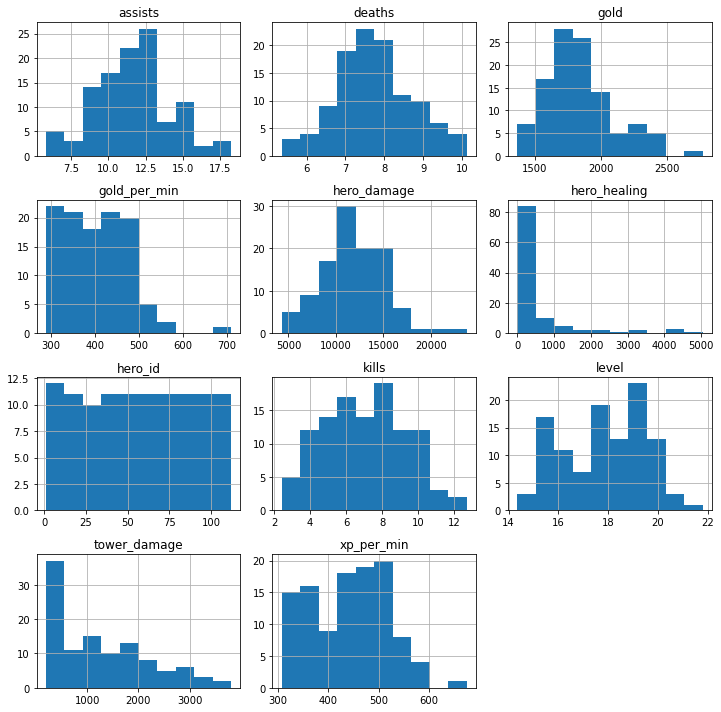

In [30]:
heroes_stats.hist(figsize= (10,10))
plt.tight_layout()

we can see that most of the variables are quite normally distributed. However, these variables in our dataset are at varying scales. For Instance if you refer to the histograms above you can see that the variable “gold_per_min” ranges from 300 to 700, whilst “deaths” or “kills” range from 0 to 12. This poses a problem for many popular machine learning algorithms. Standardising the scale for all continuous variables can often result in an increase in performance of machine learning models.

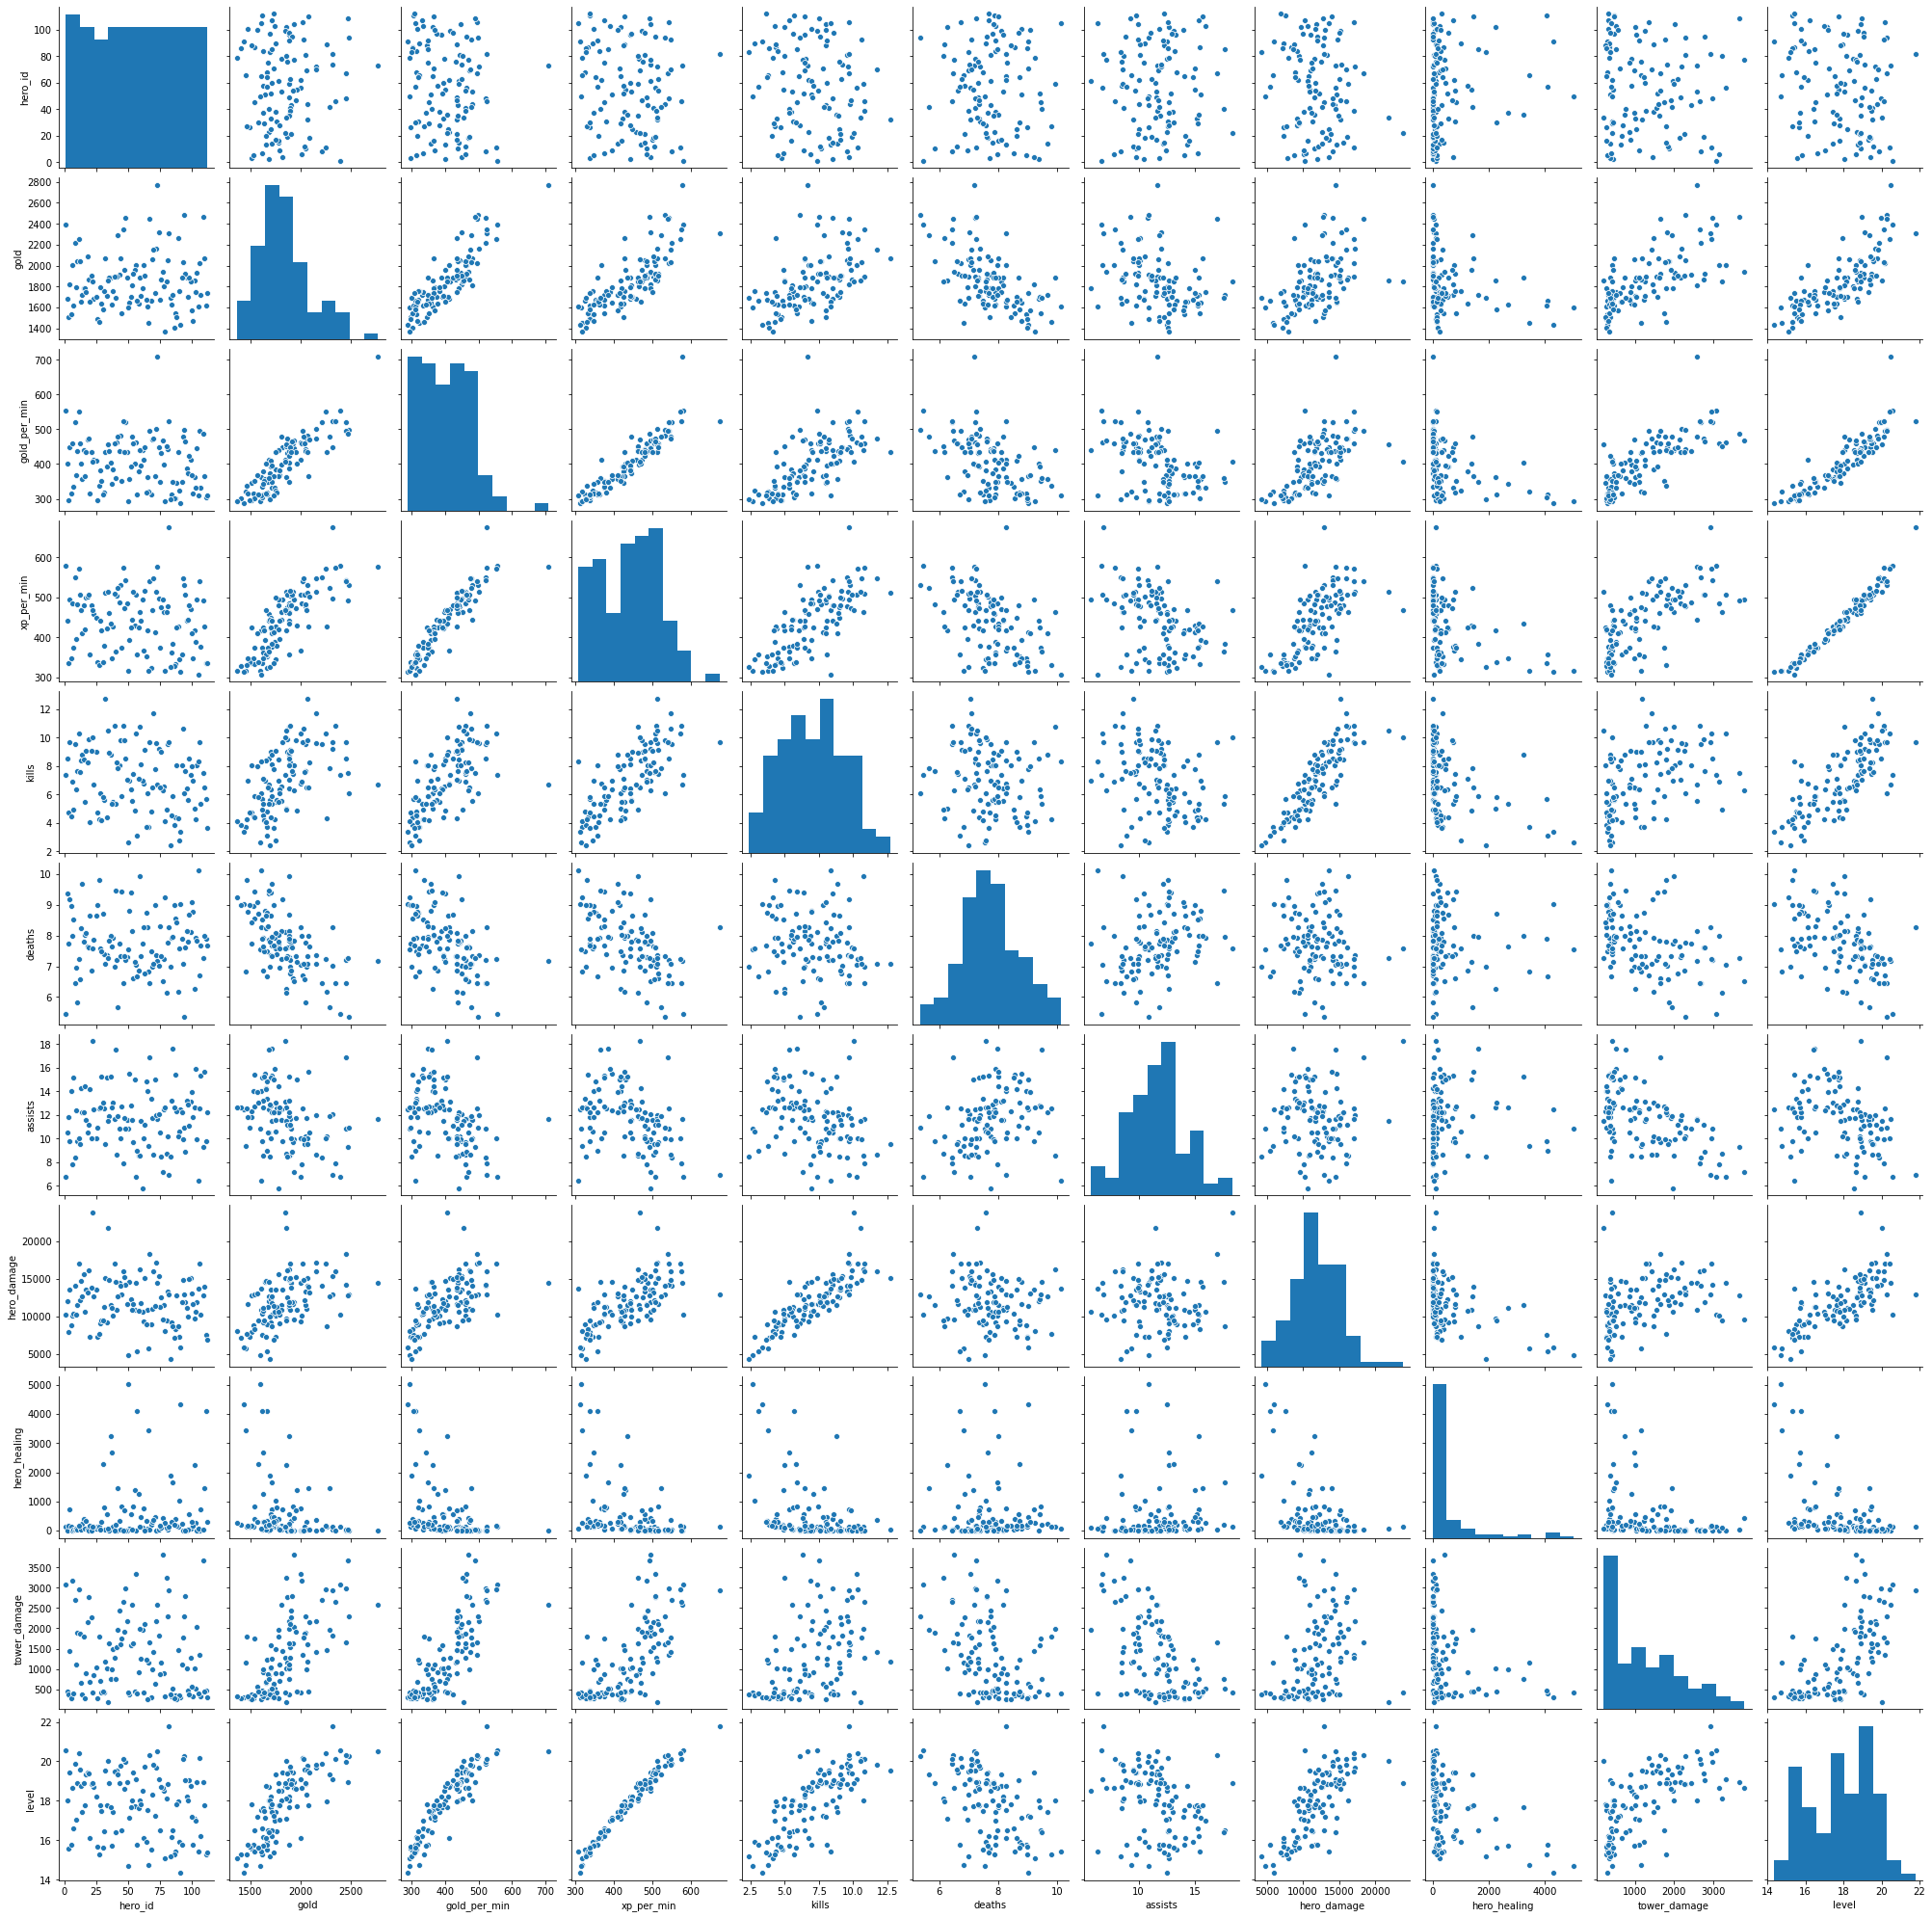

In [31]:
sns.pairplot(heroes_stats)

In [34]:
heroes_stats.index

Index(['Abaddon', 'Alchemist', 'Ancient Apparition', 'Anti-Mage', 'Axe',
       'Bane', 'Batrider', 'Beastmaster', 'Bloodseeker', 'Bounty Hunter',
       ...
       'Venomancer', 'Viper', 'Visage', 'Warlock', 'Weaver', 'Windranger',
       'Winter Wyvern', 'Witch Doctor', 'Wraith King', 'Zeus'],
      dtype='object', name='localized_name', length=110)

In [33]:
heroes_clustering = heroes_stats[['gold_per_min','kills','deaths','assists','hero_damage','tower_damage']]
heroes_clustering

,gold_per_min,kills,deaths,assists,hero_damage,tower_damage
localized_name,,,,,,
Abaddon,363.055287,5.005740,6.278550,12.647432,9660.720846,1009.606949
Alchemist,709.545455,6.679019,7.173369,11.647562,14438.700906,2585.172758
Ancient Apparition,313.147046,4.826151,7.492818,13.356286,8888.788094,298.453280
Anti-Mage,554.192742,7.340996,5.449979,6.722222,10162.878033,3081.401767
Axe,400.109107,8.525321,9.365138,10.498153,11945.333188,453.616605
...,...,...,...,...,...,...
Windranger,434.759973,9.061491,6.874000,9.979407,13815.913510,2273.793113
Winter Wyvern,309.383266,3.637911,7.674678,12.228401,6869.851111,314.619852
Witch Doctor,311.429450,5.791968,8.706734,13.071985,9381.819424,448.930747


### 5. Standardize features by removing the mean and scaling to unit variance

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(heroes_clustering)
heroes_clustering1=pd.DataFrame(scaler.transform(heroes_clustering),columns=heroes_clustering.columns, index=heroes_clustering.index)
heroes_clustering1

,gold_per_min,kills,deaths,assists,hero_damage,tower_damage
localized_name,,,,,,
Abaddon,-0.555277,-0.911220,-1.504610,0.391764,-0.666301,-0.305619
Alchemist,4.138802,-0.163183,-0.581589,-0.002548,0.785485,1.394354
Ancient Apparition,-1.231410,-0.991505,-0.252071,0.671310,-0.900853,-1.072926
Anti-Mage,2.034159,0.132753,-2.359295,-1.944919,-0.513721,1.929766
Axe,-0.053290,0.662204,1.679259,-0.455832,0.027877,-0.905511
...,...,...,...,...,...,...
Windranger,0.416143,0.901898,-0.890392,-0.660406,0.596252,1.058388
Winter Wyvern,-1.282400,-1.522706,-0.064479,0.226514,-1.514306,-1.055483
Witch Doctor,-1.254679,-0.559738,1.000104,0.559192,-0.751046,-0.910567


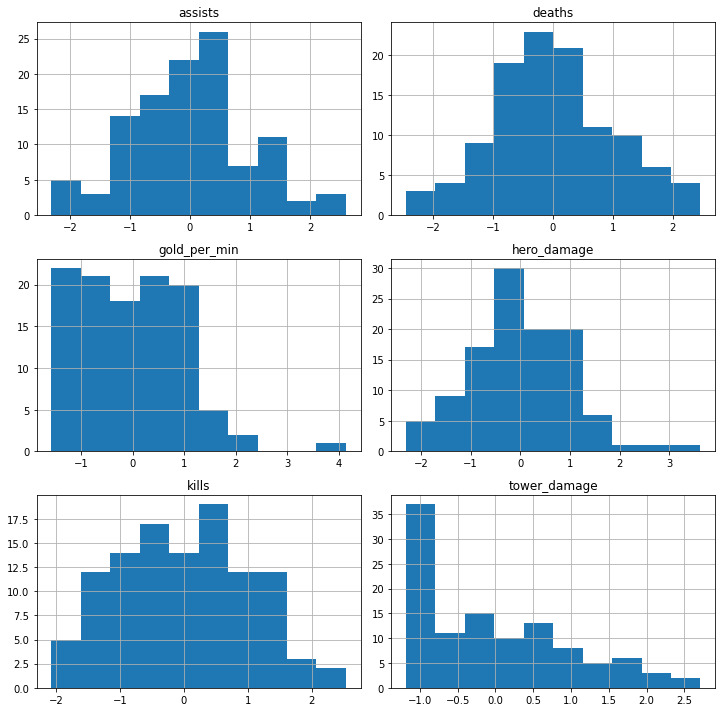

In [36]:
heroes_clustering1.hist(figsize= (10,10))
plt.tight_layout()

### 6. Perform KMeans, set k = 5, and random_state=1000

In [38]:
from sklearn.cluster import KMeans
n_clusters = 5
heroes_kmeans = KMeans(n_clusters=n_clusters,random_state=1000).fit(heroes_clustering1)
# you need to set the random_State, otherwise the clustering numbering will keep changing

##### Adding the label to the dataframe

In [39]:
heroes_clustering1['cluster']=heroes_kmeans.labels_

In [40]:
heroes_clustering1

,gold_per_min,kills,deaths,assists,hero_damage,tower_damage,cluster
localized_name,,,,,,,
Abaddon,-0.555277,-0.911220,-1.504610,0.391764,-0.666301,-0.305619,4
Alchemist,4.138802,-0.163183,-0.581589,-0.002548,0.785485,1.394354,3
Ancient Apparition,-1.231410,-0.991505,-0.252071,0.671310,-0.900853,-1.072926,4
Anti-Mage,2.034159,0.132753,-2.359295,-1.944919,-0.513721,1.929766,3
Axe,-0.053290,0.662204,1.679259,-0.455832,0.027877,-0.905511,0
...,...,...,...,...,...,...,...
Windranger,0.416143,0.901898,-0.890392,-0.660406,0.596252,1.058388,3
Winter Wyvern,-1.282400,-1.522706,-0.064479,0.226514,-1.514306,-1.055483,1
Witch Doctor,-1.254679,-0.559738,1.000104,0.559192,-0.751046,-0.910567,4


In [41]:
heroes_clustering1['cluster'].value_counts()

3    30
4    26
0    23
2    17
1    14
Name: cluster, dtype: int64

In [42]:
heroes_clustering1[heroes_clustering1['cluster'] == 3]

,gold_per_min,kills,deaths,assists,hero_damage,tower_damage,cluster
localized_name,,,,,,,
Alchemist,4.138802,-0.163183,-0.581589,-0.002548,0.785485,1.394354,3
Anti-Mage,2.034159,0.132753,-2.359295,-1.944919,-0.513721,1.929766,3
Broodmother,0.507745,-0.042854,0.000374,-2.310149,-0.373402,0.729051,3
Chaos Knight,0.531797,1.121010,0.018057,-0.593568,0.421589,1.069813,3
Clinkz,0.795030,1.432182,-0.709657,-1.924937,0.785774,2.205110,3
Death Prophet,0.445364,0.438270,0.007372,-0.308564,0.775225,1.226906,3
Doom,0.919514,-0.258081,-0.781343,0.035788,-0.270114,-0.330226,3
Dragon Knight,0.428998,-0.017826,-0.437535,-0.027055,-0.083316,0.941721,3
Drow Ranger,0.752051,-0.078141,0.250529,-1.519339,-0.524425,2.017079,3


### 7. Peform PCA to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables

In [43]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(heroes_stats)
reduced_data

array([[-2.43655729e+03,  9.33361730e+02],
       [ 2.78691517e+03, -9.53693893e+02],
       [-2.97283093e+03,  2.24684633e+01],
       [-1.40518164e+03, -1.93294851e+03],
       [ 8.09097911e+01,  3.04560751e+02],
       [-3.99627622e+03, -2.34055537e+02],
       [-1.07335054e+03,  2.89943978e+02],
       [-1.65412272e+03, -7.11174627e+02],
       [ 1.59225282e+03,  3.02455004e+02],
       [-2.59714990e+03,  3.22347706e+02],
       [-2.83321870e+02, -9.32823245e-01],
       [ 3.26856566e+03,  2.82101234e+02],
       [-1.08145871e+03, -9.80567742e+02],
       [-7.06508651e+02, -2.85017910e+02],
       [ 1.54301012e+03, -8.32433579e+02],
       [-6.42855869e+03,  9.84667806e+02],
       [ 2.82661300e+03, -1.40830746e+03],
       [ 2.65501175e+03,  8.61777584e+02],
       [-3.05031153e+03, -1.74121903e+01],
       [-1.17374312e+03,  9.89562353e+02],
       [-7.69584686e+03,  2.36431662e+03],
       [ 2.65386758e+03, -5.34474880e+02],
       [-3.58288137e+03,  2.80943833e+01],
       [-8.

### 8. Scatter plot visualization of hero map

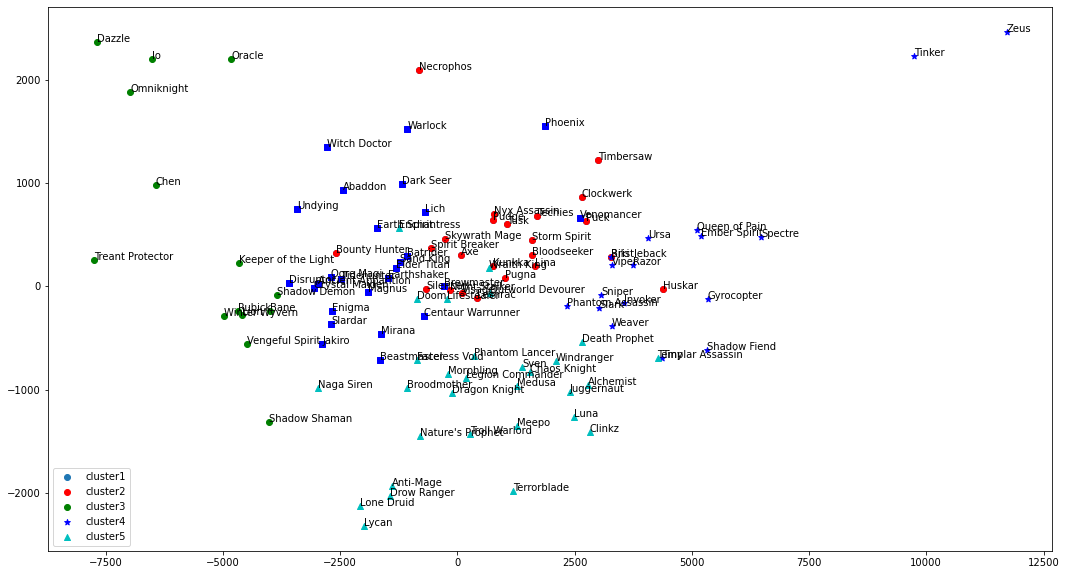

In [170]:
n1=[]
x=[]
y=[]
n2=[]
x2=[]
y2=[]
n3=[]
x3=[]
y3=[]
n4=[]
x4=[]
y4=[]
n5=[]
x5=[]
y5=[]
for i in range(0, reduced_data.shape[0]):
    if heroes_clustering1.cluster[i] == 0:
        n1.append(heroes_clustering1.index[i])
        x.append(reduced_data[i,0])
        y.append(reduced_data[i,1])
    elif heroes_clustering1.cluster[i] == 1:
        n2.append(heroes_clustering1.index[i])
        x2.append(reduced_data[i,0])
        y2.append(reduced_data[i,1])
    elif heroes_clustering1.cluster[i] == 2:
        n3.append(heroes_clustering1.index[i])
        x3.append(reduced_data[i,0])
        y3.append(reduced_data[i,1])
    elif heroes_clustering1.cluster[i] == 3:
        n4.append(heroes_clustering1.index[i])
        x4.append(reduced_data[i,0])
        y4.append(reduced_data[i,1])
    elif heroes_clustering1.cluster[i] == 4:
        n5.append(heroes_clustering1.index[i])
        x5.append(reduced_data[i,0])
        y5.append(reduced_data[i,1])


fig, ax = plt.subplots(figsize= (18,10))
ax.scatter(x, y)
plt.scatter(x, y, color='r',marker='o')
plt.scatter(x2, y2, color='g',marker='o')
plt.scatter(x3, y3, color='b',marker='*')
plt.scatter(x4, y4, color='c',marker='^')
plt.scatter(x5, y5, color='b',marker='s')

plt.legend(['cluster1','cluster2','cluster3','cluster4','cluster5'])

for i, txt in enumerate(n1):
    ax.annotate(txt, (x[i], y[i]))

for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]))
    
for i, txt in enumerate(n3):
    ax.annotate(txt, (x3[i], y3[i]))
    
for i, txt in enumerate(n4):
    ax.annotate(txt, (x4[i], y4[i]))
    
for i, txt in enumerate(n5):
    ax.annotate(txt, (x5[i], y5[i]))
    


#### Based on the Hero map above, K-mean algorithm was able to group heroes based on their similarities. For example, cluster4 consists of Zeus, Tinker, Shadow Fiend, Templar Assassin and so on. These heroes always go 1 on 1 and easily move to other lanes to gank enemies. Hence, the cluster4 can be one of the most crucial aspects to winning a match. And as any cluster4 player knows, losing mid early on can quickly snowball to a fast loss. Therefore, identifying who is cluster4 player and what hero he used is vital to predict the win rate before the match.

In [69]:
matches.columns

Index(['match_id', 'start_time', 'duration', 'tower_status_radiant',
       'tower_status_dire', 'barracks_status_dire', 'barracks_status_radiant',
       'first_blood_time', 'game_mode', 'radiant_win', 'negative_votes',
       'positive_votes', 'cluster'],
      dtype='object')

In [71]:
heroes

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden
...,...,...,...
107,npc_dota_hero_terrorblade,109,Terrorblade
108,npc_dota_hero_phoenix,110,Phoenix
109,npc_dota_hero_oracle,111,Oracle
110,npc_dota_hero_winter_wyvern,112,Winter Wyvern


### 9. Identify each hero position using hero map

In [72]:
hero_postion = pd.merge(heroes, heroes_clustering1, on='localized_name')
hero_postion.head()

,name,hero_id,localized_name,gold_per_min,kills,deaths,assists,hero_damage,tower_damage,cluster
0,npc_dota_hero_antimage,1,Anti-Mage,2.034159,0.132753,-2.359295,-1.944919,-0.513721,1.929766,3
1,npc_dota_hero_axe,2,Axe,-0.053290,0.662204,1.679259,-0.455832,0.027877,-0.905511,0
2,npc_dota_hero_bane,3,Bane,-1.473283,-1.017975,-0.016582,0.062295,-1.219851,-0.983841,1
3,npc_dota_hero_bloodseeker,4,Bloodseeker,0.590659,1.168256,1.498727,-0.752343,0.496504,0.169143,0
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden,-1.210793,-1.144603,1.247132,0.935973,-0.926300,-1.083223,4


In [73]:
def dummy(x):
        if x ==0:
            return ('cluster1')
        elif x == 1:
            return ('cluster2')
        elif x == 2:
            return ('cluster3')
        elif x == 3:
            return ('cluster4')
        elif x == 4:
            return ('cluster5')

hero_postion["position"]=hero_postion['cluster'].apply(dummy)

hero_postion.head()

,name,hero_id,localized_name,gold_per_min,kills,deaths,assists,hero_damage,tower_damage,cluster,position
0,npc_dota_hero_antimage,1,Anti-Mage,2.034159,0.132753,-2.359295,-1.944919,-0.513721,1.929766,3,cluster4
1,npc_dota_hero_axe,2,Axe,-0.053290,0.662204,1.679259,-0.455832,0.027877,-0.905511,0,cluster1
2,npc_dota_hero_bane,3,Bane,-1.473283,-1.017975,-0.016582,0.062295,-1.219851,-0.983841,1,cluster2
3,npc_dota_hero_bloodseeker,4,Bloodseeker,0.590659,1.168256,1.498727,-0.752343,0.496504,0.169143,0,cluster1
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden,-1.210793,-1.144603,1.247132,0.935973,-0.926300,-1.083223,4,cluster5


In [ ]:
# hero_postion
# hero_postion.to_csv(r'hero_postion.csv')

### 10. Find out statistics about position in Dota2

In [74]:
hero_position_info= pd.merge(heroes_stats,hero_postion, on='localized_name').groupby(['position']).mean()
hero_position_info

,hero_id_x,gold,gold_per_min_x,xp_per_min,kills_x,deaths_x,assists_x,hero_damage_x,hero_healing,tower_damage_x,level,hero_id_y,gold_per_min_y,kills_y,deaths_y,assists_y,hero_damage_y,tower_damage_y,cluster
position,,,,,,,,,,,,,,,,,,,
cluster1,56.173913,1721.345077,384.931400,422.206341,7.962604,8.721619,11.892046,12880.609885,425.200992,853.002011,17.578480,56.173913,-0.258911,0.410642,1.015457,0.093868,0.312060,-0.474590,0
cluster2,64.357143,1561.087026,306.452342,332.426512,3.799123,8.112542,11.237481,6653.424636,1808.418563,538.157431,15.324888,64.357143,-1.322107,-1.450636,0.387184,-0.164268,-1.580067,-0.814295,1
cluster3,49.588235,2030.984957,465.569879,513.846017,10.049516,7.212806,11.828430,16705.222047,118.229806,1650.886868,19.580395,49.588235,0.833540,1.343593,-0.540909,0.068780,1.474167,0.386296,2
cluster4,55.200000,2085.079531,474.905553,505.936083,7.672442,6.973433,9.355831,12130.530892,187.548189,2351.208877,19.184328,55.200000,0.960015,0.280925,-0.787826,-0.906321,0.084149,1.141916,3
cluster5,57.846154,1725.832314,351.503359,393.970540,5.288538,7.888351,14.205476,10253.383115,636.432291,633.079000,16.905653,57.846154,-0.711777,-0.784796,0.155928,1.006199,-0.486221,-0.711878,4


### 11. visualization of Dota2 postion

cluster1         AxesSubplot(0.1,0.679412;0.363636x0.220588)
cluster2    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
cluster3         AxesSubplot(0.1,0.414706;0.363636x0.220588)
cluster4    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
cluster5             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

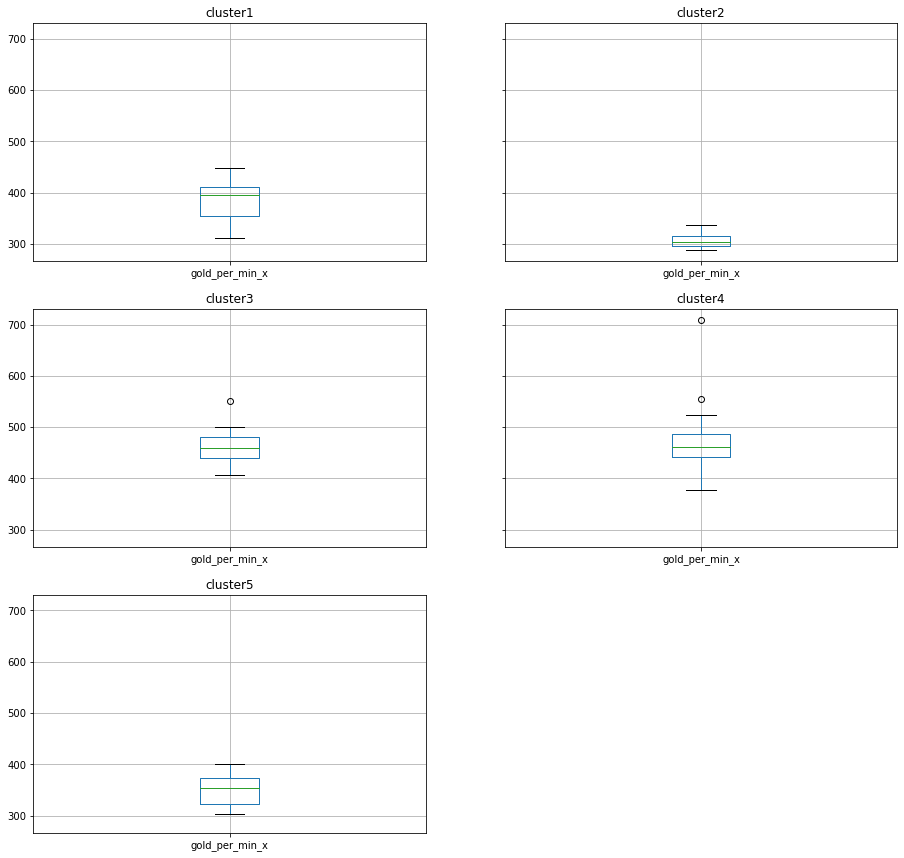

In [75]:
hero_position_info1= pd.merge(heroes_stats,hero_postion, on='localized_name').groupby(['position'])
hero_position_info1.boxplot(column='gold_per_min_x',figsize=(15,15))

#### Based on the boxplot above, we can see that Cluster3 and cluster 4 have high gold_per_min

In [76]:
hero_position_info

,hero_id_x,gold,gold_per_min_x,xp_per_min,kills_x,deaths_x,assists_x,hero_damage_x,hero_healing,tower_damage_x,level,hero_id_y,gold_per_min_y,kills_y,deaths_y,assists_y,hero_damage_y,tower_damage_y,cluster
position,,,,,,,,,,,,,,,,,,,
cluster1,56.173913,1721.345077,384.931400,422.206341,7.962604,8.721619,11.892046,12880.609885,425.200992,853.002011,17.578480,56.173913,-0.258911,0.410642,1.015457,0.093868,0.312060,-0.474590,0
cluster2,64.357143,1561.087026,306.452342,332.426512,3.799123,8.112542,11.237481,6653.424636,1808.418563,538.157431,15.324888,64.357143,-1.322107,-1.450636,0.387184,-0.164268,-1.580067,-0.814295,1
cluster3,49.588235,2030.984957,465.569879,513.846017,10.049516,7.212806,11.828430,16705.222047,118.229806,1650.886868,19.580395,49.588235,0.833540,1.343593,-0.540909,0.068780,1.474167,0.386296,2
cluster4,55.200000,2085.079531,474.905553,505.936083,7.672442,6.973433,9.355831,12130.530892,187.548189,2351.208877,19.184328,55.200000,0.960015,0.280925,-0.787826,-0.906321,0.084149,1.141916,3
cluster5,57.846154,1725.832314,351.503359,393.970540,5.288538,7.888351,14.205476,10253.383115,636.432291,633.079000,16.905653,57.846154,-0.711777,-0.784796,0.155928,1.006199,-0.486221,-0.711878,4


In [77]:
hero_position_info = hero_position_info[['gold','gold_per_min_x','xp_per_min','kills_x','deaths_x'
                                        ,'assists_x','hero_damage_x','tower_damage_x','level']]

In [78]:
hero_position_info

,gold,gold_per_min_x,xp_per_min,kills_x,deaths_x,assists_x,hero_damage_x,tower_damage_x,level
position,,,,,,,,,
cluster1,1721.345077,384.931400,422.206341,7.962604,8.721619,11.892046,12880.609885,853.002011,17.578480
cluster2,1561.087026,306.452342,332.426512,3.799123,8.112542,11.237481,6653.424636,538.157431,15.324888
cluster3,2030.984957,465.569879,513.846017,10.049516,7.212806,11.828430,16705.222047,1650.886868,19.580395
cluster4,2085.079531,474.905553,505.936083,7.672442,6.973433,9.355831,12130.530892,2351.208877,19.184328
cluster5,1725.832314,351.503359,393.970540,5.288538,7.888351,14.205476,10253.383115,633.079000,16.905653


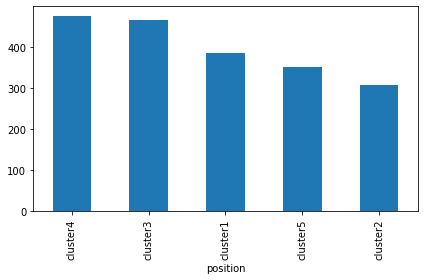

In [79]:
ax = hero_position_info.sort_values('gold_per_min_x',ascending=False)['gold_per_min_x'].plot(kind="bar")
plt.tight_layout()

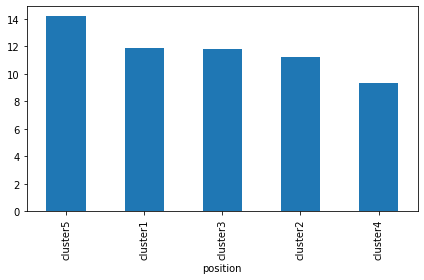

In [80]:
ax = hero_position_info.sort_values('assists_x',ascending=False)['assists_x'].plot(kind="bar")
plt.tight_layout()

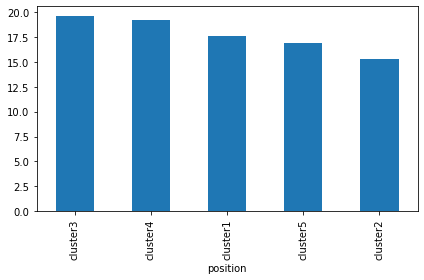

In [81]:
ax = hero_position_info.sort_values('level',ascending=False)['level'].plot(kind="bar")
plt.tight_layout()

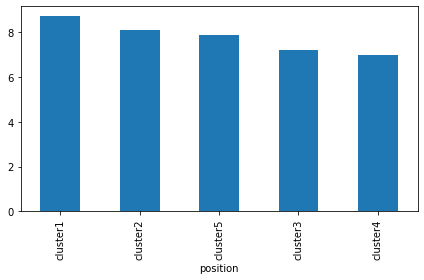

In [82]:
ax = hero_position_info.sort_values('deaths_x',ascending=False)['deaths_x'].plot(kind="bar")
plt.tight_layout()